# ¡Hola bienvenindos al análisis de Natalia! 😊



-----

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto tiene modificaciones del original. Reduje el tamaño del conjunto se tuvo el cuidado de conservar las distribuciones de los datos originales en los cambios.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos:

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

In [ ]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
dfiorders= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
dfproducts= pd.read_csv('/datasets/products.csv', sep=';')
dfaisles= pd.read_csv('/datasets/aisles.csv', sep=';')
dfdepartments= pd.read_csv('/datasets/departments.csv', sep=';')
dforderproducts= pd.read_csv('/datasets/order_products.csv', sep=';')


In [ ]:
# mostrar información del DataFrame
dfiorders.info()
dfiorders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
# mostrar información del DataFrame
dfproducts.info()
dfproducts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
# mostrar información del DataFrame
dfaisles.info()
print()
dfaisles.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [ ]:
# mostrar información del DataFrame
dfdepartments.info()
dfdepartments.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [ ]:
# mostrar información del DataFrame
dforderproducts.info()
print()
dforderproducts.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1




Tenemos 5 datasets de entre 2 a 4 columnas cada uno, algunos de ellos tienen float como variables asignada en dias por lo que no ayuda a la practicidad del analisis


# Paso 2. Preprocesamiento de los datos


### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print(dfiorders.duplicated().sum())
print()

filas_duplicadas = dfiorders[dfiorders.duplicated()]

print(filas_duplicadas)

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

In [ ]:
# Basándote en tus hallazgos,

#los pedidos que se hicieron el miércoles a las 2:00 a.m.

mier_2am = dfiorders[(dfiorders['order_dow'] == 3) & (dfiorders['order_hour_of_day'] == 2)]
print(mier_2am)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [ ]:
# Elimina los pedidos duplicados

dfiorders = dfiorders.drop_duplicates()
dfiorders = dfiorders.reset_index(drop=True)


In [ ]:
# Vuelve a verificar si hay filas duplicadas
print(dfiorders.duplicated().sum())
print()

0



In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(dfiorders['order_id'].duplicated().sum())

0


Identificamos que los pedidos de un determinado dia a las 2 am vinieron como un error entonces nos deshicimos de esas filas y luego verificar si seguiamos teniendo duplicados

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas

dfproducts.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay ID de productos duplicados

dfproducts['product_id'].duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

dfproducts['product_name_upper'] = dfproducts['product_name'].str.upper()
dfproducts['product_name_upper'].duplicated().sum()
dfproducts['product_name'].duplicated().sum()

print(dfproducts.head(5))

#aca podemos ver que si comparamos hay una diferencia con y sin mayuscula de duplicados por lo que posterior voy a eliminar la columna que cree
dfproducts = dfproducts.drop('product_name_upper', axis=1)
dfproducts['product_name'] = dfproducts['product_name'].str.upper()


   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id                                 product_name_upper  
0             19                         CHOCOLATE SANDWICH COOKIES  
1             13                                   ALL-SEASONS SALT  
2              7               ROBUST GOLDEN UNSWEETENED OOLONG TEA  
3              1  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...  
4             13                          GREEN CHILE ANYTIME SAUCE  


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes

dfproducts = dfproducts.drop_duplicates(subset=['product_name'])

print("Duplicados despues de limpieza:", dfproducts['product_name'].duplicated().sum())
print()
dfproducts.columns

print(dfproducts.head(5))


Duplicados despues de limpieza: 0

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


En este ejercicio si buscamos los valores duplicados primero cree una columna nueva para comparar la diferencia entre pasarlo a mayuscula o no, luego tuve que eliminar esta columna y proceder a eliminar los duplicados, ahora aplicamos una formula donde solo se encarga de mirar a los valores duplicados de la columna en especifico product_id, por lo que nos quedamos solo con un valor de cada producto.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

print(dfdepartments.duplicated().sum())

0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos

print(dfdepartments['department_id'].duplicated().sum())

print()

print(dfdepartments['department_id'].value_counts())

0

1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: department_id, dtype: int64


#aplicamos a todo el dt para ver si habia duplicados, y luego lo mismo pero para una sola columna, y luego value counts para ver cuantos valores hay de cada fila

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

dfaisles.duplicated().sum()
dfaisles.columns


Index(['aisle_id', 'aisle'], dtype='object')

In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
dfaisles['aisle_id'].duplicated().sum()


0

En esta tabla verificamos que no hubieran duplicados tanto en toda la tabla cuanto en una columna particular

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

print(dforderproducts.duplicated().sum())
print()
dforderproducts.columns



0



Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso


print(dforderproducts['product_id'].duplicated().sum())    

4499434


Muchas veces que cuando usamos el metodo duplicated, estamos aplicandolo para que vea que todo el DF tenga filas idénticas, sin embargo hay veces que hay columnas con duplicados que hay  que tratar, en este caso no es necesario borrar pro que estamos viendo que lo que se repite es product ID que es normal que se repita

## Tratamiento de valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'

print(dfproducts['product_name'].isnull().sum())

1


Encontramos que en esta columna product_name tiene un valor ausente

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

productos_sn = dfproducts[dfproducts['product_name'].isnull()]
print(productos_sn)
print()
print(productos_sn['aisle_id'].unique())

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21

[100]


Descubrimos que un producto is null tiene el pasillo D100

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21


print(productos_sn['department_id'].unique())



[21]


In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


dep_21 = dfproducts[dfproducts['department_id'] == 21]
print(dep_21)

aisle_100 = dfproducts[dfproducts['aisle_id'] == 100]
print(aisle_100)



    product_id product_name  aisle_id  department_id
37          38          NaN       100             21
    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


Filtrando ambas columnas podemos identificar que ahi mismo se encuentra el valor NaN

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'

dfproducts['product_name'].fillna('Unknown', inplace=True)

aisle_100 = dfproducts[dfproducts['aisle_id'] == 100]
print(aisle_100)


    product_id product_name  aisle_id  department_id
37          38      Unknown       100             21


Primero pense en el metodo replace, luego me di cuenta que replace no reemplaza valores ausentes, entonces use fillna y verificando nuevamente con el filtro podemos ver que ya sale Unknown

### `orders` data frame

In [ ]:

# Encuentra los valores ausentes

dfiorders.isnull().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

prior_order = dfiorders[dfiorders['days_since_prior_order'].isnull()]

print(prior_order['order_number'].unique())
print("Números de orden con valores ausentes:", prior_order['order_number'].unique())

no_primer_pedido = prior_order[prior_order['order_number'] != 1]

print("Cantidad de valores ausentes que no son primer pedido:", len(no_primer_pedido))

dfiorders['days_since_prior_order'].fillna(0, inplace=True)



[1]
Números de orden con valores ausentes: [1]
Cantidad de valores ausentes que no son primer pedido: 0


Efectivamente los valores ausentes representan a pedidos que no son el primero pedido ha pasado 0 dias desde el pedido anterior 

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes

print(dforderproducts.isnull().sum())


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print("El valor max para add_to_cart_order es:", (dforderproducts['add_to_cart_order'].max()))
print("El valor min para add_to_cart_order es:", (dforderproducts['add_to_cart_order'].min()))
print()

print(dforderproducts['add_to_cart_order'].value_counts())
dforderproducts[dforderproducts['add_to_cart_order'] == 64]


 

El valor max para add_to_cart_order es: 64.0
El valor min para add_to_cart_order es: 1.0

1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
60.0       127
61.0       114
62.0        98
63.0        87
64.0        75
Name: add_to_cart_order, Length: 64, dtype: int64


,order_id,product_id,add_to_cart_order,reordered
76044,1386261,31847,64.0,0
154176,854647,22922,64.0,0
177733,3383594,7970,64.0,0
213282,2470674,30257,64.0,0
233518,1968313,495,64.0,1
...,...,...,...,...
4148751,2999801,24722,64.0,1
4235552,3308010,3888,64.0,1
4409436,747668,31268,64.0,0
4419785,1633337,34,64.0,0


Como esta columna representa la gente que metio al carrito y comprende entre 1 y 64 productos, entonces 836 ordenes no llegaron al carrito.
Luego de revisar nuevamente vemos que 75 carritos se añadieron 64 veces y me da la certeza de que llegan a esos números por que también hay carritos con 63, 62, 61 incluso 127 personas hicieron carritos de hasta 60 órdenes.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
#identificar las filas donde add_to_cart_order es Nan y las guarda en id_valor_ausente
id_valor_ausente = dforderproducts[dforderproducts['add_to_cart_order'].isnull()]

print(id_valor_ausente)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

pedidos_ausente = id_valor_ausente.groupby('order_id').size()

print(pedidos_ausente)
print()
print("Valor mínimo:", pedidos_ausente.min())
print("Valor máximo:", pedidos_ausente.max())

#solo para ver si hay alguna coincidencia con los reordered
print(id_valor_ausente['reordered'].value_counts())



order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64

Valor mínimo: 1
Valor máximo: 63
0    517
1    319
Name: reordered, dtype: int64


Describe brevemente cuáles son tus hallazgos.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

dforderproducts['add_to_cart_order'].fillna(999, inplace=True)
dforderproducts['add_to_cart_order'] = dforderproducts['add_to_cart_order'].astype(int)

print("Cantidad de valores 999:", (dforderproducts['add_to_cart_order'] == 999).sum())

Cantidad de valores 999: 836


Detectamos 836 valores ausentes NaN por lo que se indagó en entender si estaban dentro del rango normal o había sido un tema del sistema entonces probamos la hipótesis, vimos que efectivamente estaban dentro del rango y bueno decidimos no más reemplazar por 999 los 836 valores ausentes.

## Conclusiones

En el pre procesamiento es importante el criterio e indagar un poco con la misma información por que se esta teniendo esa cantidad de valores ausentes o nulos, o que es la mejor alternativa si reemplazar, eliminar, en el caso que vimos donde analizabamos en todo el df si existian duplicados, vimos que haciendo el ejercicio en la columna que nos interesa si hay una cantidad de duplicados que no puede existir por ser una base de catálogos por ejemplo, entonces se trata de entender que dice cada data frame para sacar conclusiones y operar la desición.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, analizo:

### [A1] Verifica que los valores sean sensibles

In [ ]:
dfiorders.columns

print("El valor max para order hour day es:", dfiorders['order_hour_of_day'].max())
print("El valor min para order hour day es:", dfiorders['order_hour_of_day'].min())


El valor max para order hour day es: 23
El valor min para order hour day es: 0


In [ ]:
print("El valor max para order dow es:", dfiorders['order_dow'].max())
print("El valor min para order dow es:",dfiorders['order_dow'].min())

El valor max para order dow es: 6
El valor min para order dow es: 0


Efectivamente esta en el rango de las 24 horas y 6 dias de la semana

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0    2991
1    1671
2     958
3     744
4     735
Name: user_id, dtype: int64


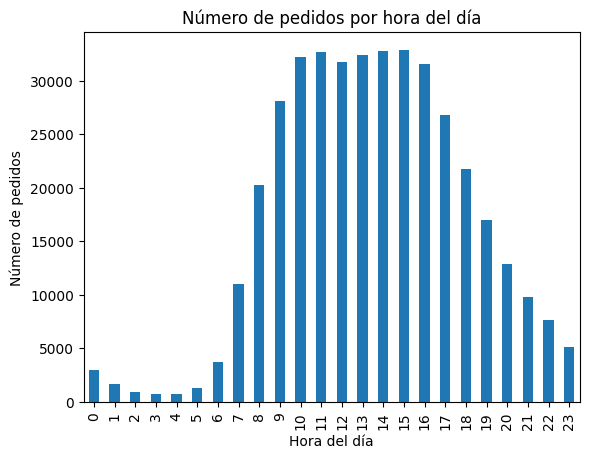

In [ ]:
dfiorders.columns

personas_por_hora = dfiorders.groupby('order_hour_of_day')['user_id'].nunique()
print(personas_por_hora.head())

personas_por_hora.plot(kind='bar', 
                      title='Número de pedidos por hora del día',
                      xlabel='Hora del día',
                      ylabel='Número de pedidos')
plt.show()


El gráfico de barras nos permite entender donde están los picos de pedidos donde cada barra representa una hora del día y poder entender cuales son las horas mas relevantes donde el comportamiento de compra crece.

### [A3] ¿Qué día de la semana compran víveres las personas?

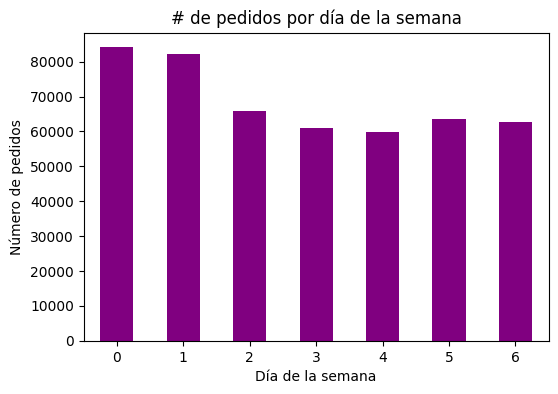

In [ ]:
pedidos_dia = dfiorders['order_dow'].value_counts().sort_index()

pedidos_dia.plot (kind='bar', 
                     title='# de pedidos por día de la semana',
                     xlabel='Día de la semana',
                     ylabel='Número de pedidos',
                     color='purple',
                     figsize=(6, 4))


plt.xticks(rotation=0)  
plt.show()



Los días de la semana con mayor frecuencia de pedidos son los Domingo y Lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

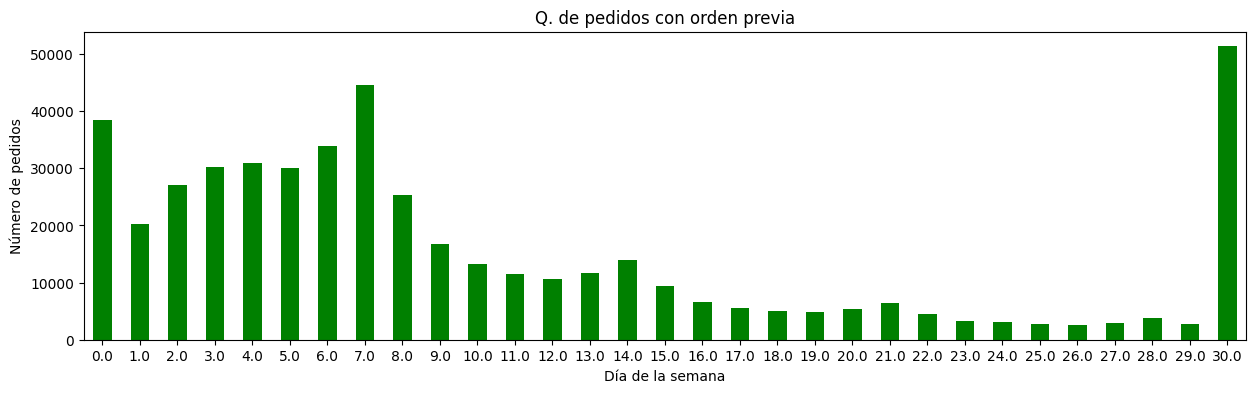

In [ ]:
orden_previa = dfiorders['days_since_prior_order'].value_counts().sort_index()

orden_previa.plot (kind='bar', 
                     title='Q. de pedidos con orden previa',
                     xlabel='Día de la semana',
                     ylabel='Número de pedidos',
                     color='green',
                     figsize=(15, 4))
plt.xticks(rotation=0)  
plt.show()



### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

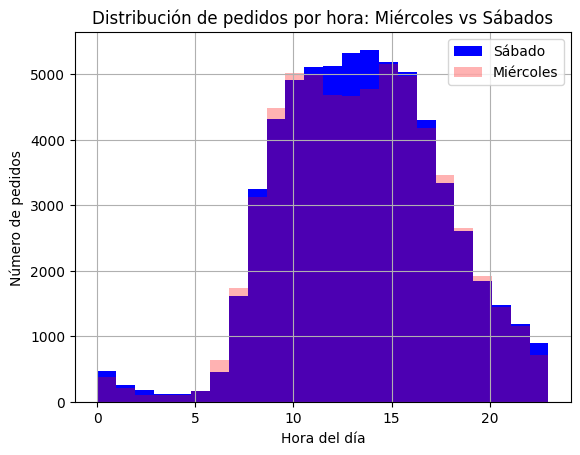

In [ ]:
sabado = dfiorders[dfiorders['order_dow'] == 6]
miercoles = dfiorders[dfiorders['order_dow'] == 3]

sabado['order_hour_of_day'].hist(bins=24, label='Sábado', color='blue')
miercoles['order_hour_of_day'].hist(bins=24, alpha=0.3, label='Miércoles', color='red')

plt.title('Distribución de pedidos por hora: Miércoles vs Sábados')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.legend()
plt.show()

En el histograma principalmente a las horas entre 12 y 15 hay un mayor nro. de pedidos los días sábados, a pesar que son muy similares podemos ver que los días sábados existe un comportamiento de los usuarios que prefieren realizar sus compras en éstos horarios puede estar dado por que son momentos en los que no estan en horario laboral.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
pedidos_por_cliente = dfiorders.groupby('user_id')['order_id'].count()
print(pedidos_por_cliente)
distr_pedidos = pedidos_por_cliente.value_counts()

distr_pedidos.plot(kind='bar', 
                         title='Distribución del número de pedidos por cliente',
                         xlabel='Número de pedidos',
                         ylabel='Número de clientes')
plt.show()

La cantidad de productos de mayor repetición es 1 producto con una diferencia exponencial desde el 2 y asi sucesivamente

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:

print(dfproducts.columns)
print()
print(dforderproducts.columns)



Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [ ]:
id_mas_vendidos = dforderproducts['product_id'].value_counts(). head(20)
id_mas_vendidos_df = id_mas_vendidos.to_frame(name='cantidad_pedidos')
id_mas_vendidos_df = id_mas_vendidos_df.reset_index()
id_mas_vendidos_df = id_mas_vendidos_df.rename(columns={'index': 'product_id'})

print()
productos_mas_vendidos = id_mas_vendidos_df.merge(dfproducts, on='product_id', how='left')
print(productos_mas_vendidos[['product_id', 'product_name', 'cantidad_pedidos']])




    product_id              product_name  cantidad_pedidos
0        24852                    BANANA             66050
1        13176    BAG OF ORGANIC BANANAS             53297
2        21137      ORGANIC STRAWBERRIES             37039
3        21903      ORGANIC BABY SPINACH             33971
4        47209      ORGANIC HASS AVOCADO             29773
5        47766           ORGANIC AVOCADO             24689
6        47626               LARGE LEMON             21495
7        16797              STRAWBERRIES             20018
8        26209                     LIMES             19690
9        27845        ORGANIC WHOLE MILK             19600
10       27966       ORGANIC RASPBERRIES             19197
11       22935      ORGANIC YELLOW ONION             15898
12       24964            ORGANIC GARLIC             15292
13       45007          ORGANIC ZUCCHINI             14584
14       39275       ORGANIC BLUEBERRIES             13879
15       49683            CUCUMBER KIRBY             13

El Top 20 de productos más populares. Frutas como plátanos, fresas y aguacates lideran la lista, y hay una clara preferencia por los productos "Organic". Esto revela tendencias valiosas sobre los gustos y prioridades de los clientes.


### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1


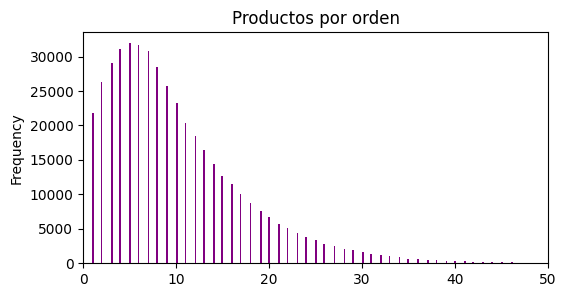

In [ ]:
# articulos_por_pedido = dforderproducts.groupby('order_id').size()
# #identificar número ID que identifica de manera única cada producto.

print(dforderproducts.head(2))
# dforderproducts.info()
# print(dforderproducts['order_id'].nunique())

productos_por_orden = dforderproducts.groupby('order_id')['product_id'].count()

productos_por_orden.plot( kind= 'hist',
                          title = 'Productos por orden',
                          xlim = (0, 50),
                          bins = 700,
                          figsize = [6, 3],
                          color = 'purple',
                          xlabel = 'Q de productos'
                         )

plt.show()


En la tabla de frecuencia que la cantidad de productos mas repetetida es 5, en el gráfico use la mayor cantidad de bins para poder identificar específicamente que días contenían las mayores frecuencias y también para entender hacia donde iba la curtosis en la distribución de los datos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:

productos_reordenados = dforderproducts[dforderproducts['reordered'] == 1]
los_mas_pedidos = productos_reordenados.groupby('product_id').size()
los_mas_pedidos_ordenado = los_mas_pedidos.sort_values(ascending=False)

top_20_reordenados = los_mas_pedidos_ordenado.head(20).to_frame(name='cantidad_reordenados')
top_20_reordenados = top_20_reordenados.reset_index()
resultado = top_20_reordenados.merge(dfproducts[['product_id', 'product_name']], on='product_id', how='left')
print(resultado[['product_id', 'product_name', 'cantidad_reordenados']])


    product_id              product_name  cantidad_reordenados
0        24852                    BANANA                 55763
1        13176    BAG OF ORGANIC BANANAS                 44450
2        21137      ORGANIC STRAWBERRIES                 28639
3        21903      ORGANIC BABY SPINACH                 26233
4        47209      ORGANIC HASS AVOCADO                 23629
5        47766           ORGANIC AVOCADO                 18743
6        27845        ORGANIC WHOLE MILK                 16251
7        47626               LARGE LEMON                 15044
8        27966       ORGANIC RASPBERRIES                 14748
9        16797              STRAWBERRIES                 13945
10       26209                     LIMES                 13327
11       22935      ORGANIC YELLOW ONION                 11145
12       24964            ORGANIC GARLIC                 10411
13       45007          ORGANIC ZUCCHINI                 10076
14       49683            CUCUMBER KIRBY               

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
#dforderproducts['reordered']
#graficos de barras dobles 

total_pedidos_producto = dforderproducts.groupby('product_id').size()
primera_orden = dforderproducts[dforderproducts['reordered'] == 0 ].groupby('product_id').size()
re_orden = dforderproducts[dforderproducts['reordered'] == 1 ].groupby('product_id').size()
proporcion_reorden = re_orden / total_pedidos_producto

# Los 20 productos con mayor tasa de reorden
top_20_proporcion = proporcion_reorden.sort_values(ascending=False).head(20)
print("Top 20 productos con mayor tasa de reorden:")
print(top_20_proporcion)




Top 20 productos con mayor tasa de reorden:
product_id
12038    1.0
1809     1.0
36122    1.0
3205     1.0
41901    1.0
46398    1.0
10378    1.0
31026    1.0
46437    1.0
20787    1.0
1814     1.0
46445    1.0
29168    1.0
25777    1.0
43895    1.0
31011    1.0
6490     1.0
1806     1.0
1805     1.0
16106    1.0
dtype: float64


,product_id,product_name,reordered
0,18121,JALAPENOS WITH SEA SALT,1.0
1,27387,BANANA GREEK NONFAT YOGURT,1.0
2,17773,QUINOA- WITH OLIVE OIL,1.0
3,49063,ROSEMARY & SEA SALT CRACKERS,1.0
4,14935,KOMBUCHA BLUEBERRY BASIL,1.0
...,...,...,...
44511,25053,FROST ARCTIC BLITZ SPORTS DRINK,0.0
44512,25051,HERB FOR BEEF GRAVY MIX,0.0
44513,25045,BANDAGES- WATERPROOF,0.0
44514,25044,PURE PACIFIC MOUNTAIN STRAWBERRY PRESERVES,0.0


<AxesSubplot:ylabel='Frequency'>

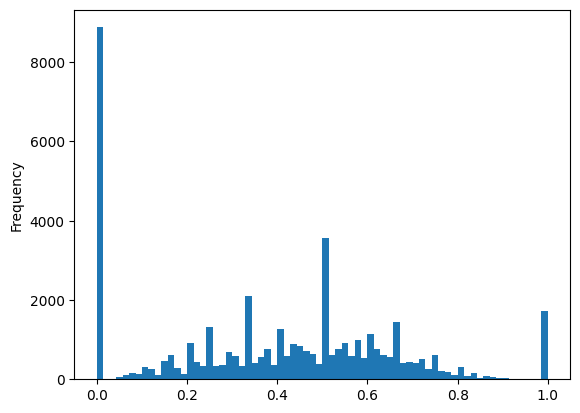

In [ ]:
tabla_nueva = dforderproducts.merge(dfproducts)
#tabla_nueva[tabla_nueva['reordered'] == 1]


histograma = tabla_nueva.groupby(['product_id', 'product_name'])['reordered'].mean().sort_values(ascending = False).reset_index()

display(histograma)

histograma['reordered'].plot( kind = 'hist',
                           bins = 70 )


Entre los productos mas vendidos está la banana, strawberry, espinaca y aguacate, ademas hay una lista de los productos mas recomprados.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
primeros_productos = dforderproducts[dforderproducts['add_to_cart_order'] == 1]
frecuencia_primeros = primeros_productos['product_id'].value_counts().head(20)

In [ ]:
top_20_primeros = frecuencia_primeros.to_frame(name='veces_primero')
top_20_primeros = top_20_primeros.reset_index()
top_20_primeros = top_20_primeros.rename(columns={'index': 'product_id'})

In [ ]:
resultado_final = top_20_primeros.merge(dfproducts[['product_id', 'product_name']], 
                                       on='product_id', how='left')
print(resultado_final)

Los productos en ser los primeros en ponerse en el carrito coinciden con los productos mas comprados, por lo que encontramos el insight de que los clientes suelen poner primero en el carrito los productos que tienen la dinámica de comprar y recomprar.

### Conclusión general del proyecto:

1. Preparación y limpieza de datos
Datasets integrados: comercio, clientes, facturación, productos y catálogos.
Procesos aplicados:
Revisión y eliminación de duplicados en columnas clave.
Identificación y tratamiento de valores ausentes en todo el DataFrame.
Validación de consistencia en las variables de interés (ej. fechas, IDs de clientes y productos).

2. Exploración inicial 
Comportamientos atípicos:
Compras registradas el miércoles a las 2 am → hipótesis: error en el sistema o comportamiento real de un segmento reducido de clientes.
Carritos con valores nulos → posible indicador de procesos de compra inconclusos (fricciones en UX).
Hipótesis de análisis:Verificar si esos patrones se repiten en diferentes periodos.
Contrastar con datos de tráfico web y sesiones para confirmar si es anomalía o comportamiento recurrente.

3. Identificación de productos clave
Productos de alta recompra: determinar top 20 artículos más pedidos.
Objetivo:Detectar drivers de fidelización.
Clasificar por categoría y margen para estrategias de cross-sell y upsell.

4. Análisis temporal y de comportamiento
Variables críticas: día de la semana, franja horaria, frecuencia de compra.
Hallazgo preliminar: miércoles al mediodía se observa mayor incremento en carritos.
Aplicaciones:Calendarizar promociones en horarios/días con mayor actividad.
Ajustar campañas publicitarias y push notifications según patrón horario y promover la reorder.

5. Aplicaciones estratégicas del análisis
Promociones: activar descuentos dinámicos en horarios de baja actividad.
Clientes: segmentar para conocer hábitos y diseñar experiencias personalizadas.
Política de precios: ajustar según productos de alta demanda y recompra.
Ticket promedio: recomendar bundles de productos asociados.
Frecuencia de compra: rediseñar la estrategia de remarketing para acortar los ciclos.